In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  

In [3]:
df = pd.read_csv("Mall_Customers_BP.csv")

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Checking how the data is distributed 

In [7]:
df.rename(columns = {"Annual Income (k$)": "Annual_Income" ,"Spending Score (1-100)": "Spending_Score" },inplace = True)

In [8]:
df.dtypes

CustomerID         int64
Genre             object
Age                int64
Annual_Income      int64
Spending_Score     int64
dtype: object

<AxesSubplot:xlabel='Age'>

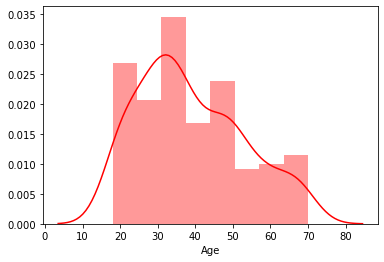

In [9]:
sns.distplot(df.Age,color = 'r')

<AxesSubplot:xlabel='Spending_Score'>

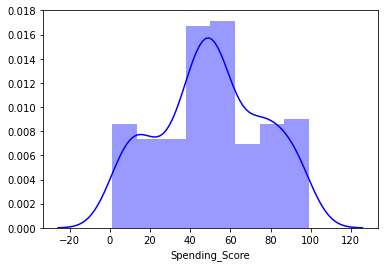

In [10]:
sns.distplot(df.Spending_Score,color = 'b')

<AxesSubplot:xlabel='Annual_Income'>

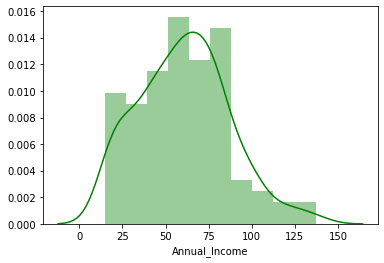

In [11]:
sns.distplot(df.Annual_Income,color = 'g')

<AxesSubplot:xlabel='Genre', ylabel='Annual_Income'>

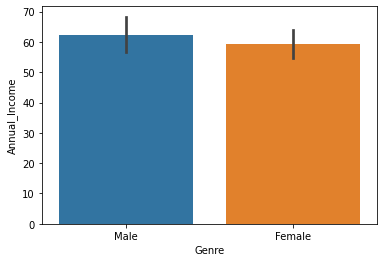

In [12]:
sns.barplot(x = 'Genre', y = "Annual_Income",data = df)

<AxesSubplot:xlabel='Genre', ylabel='Spending_Score'>

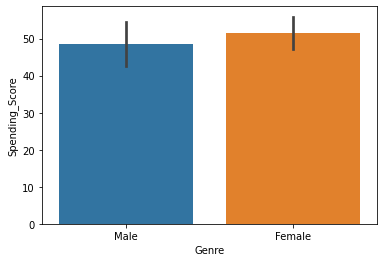

In [13]:
sns.barplot(x = 'Genre', y = 'Spending_Score',data = df)

<AxesSubplot:xlabel='Age', ylabel='Annual_Income'>

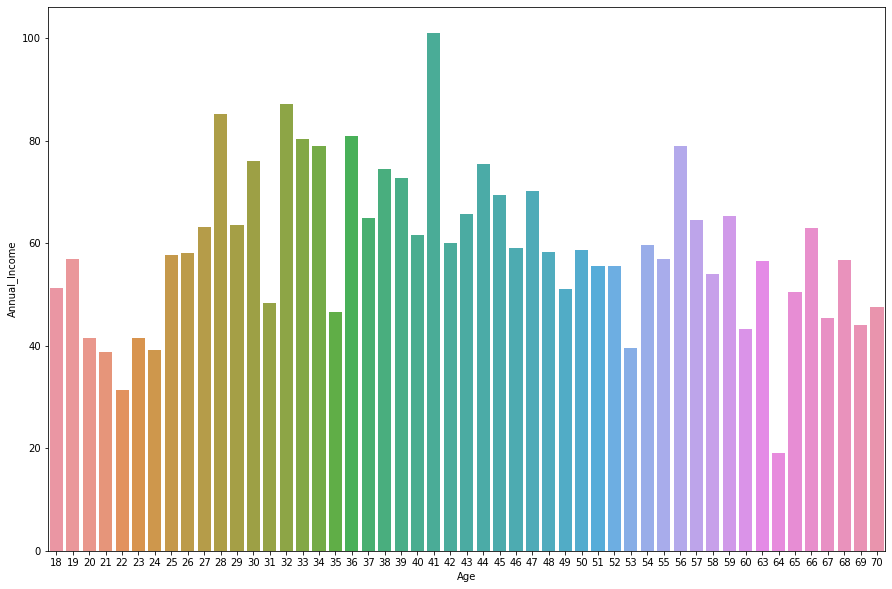

In [14]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'Age', y = 'Annual_Income',data = df,ci = False)

<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

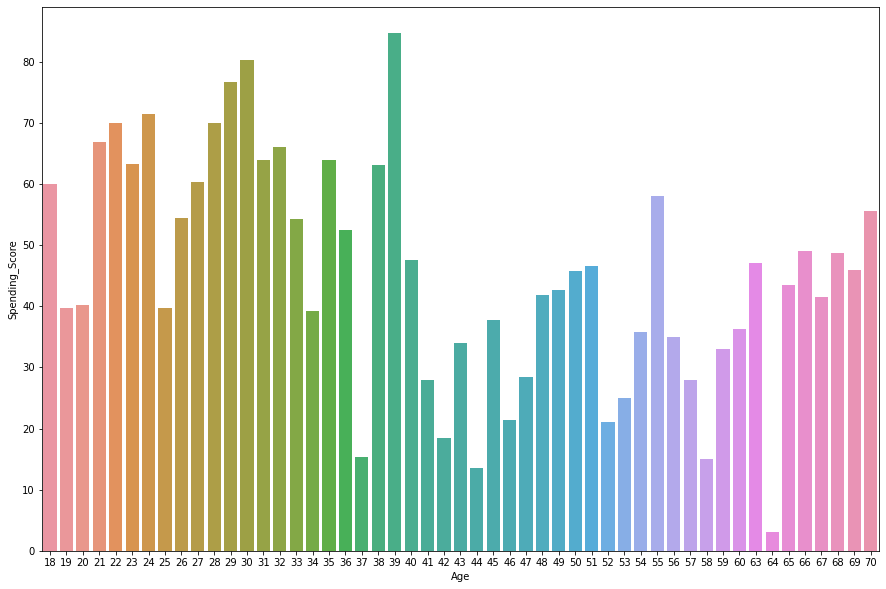

In [15]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'Age', y = 'Spending_Score',data = df,ci = False)

([<matplotlib.patches.Wedge at 0x14d2d088>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.00%'),
  Text(0.11242879316591654, -0.5893723495951058, '44.00%')])

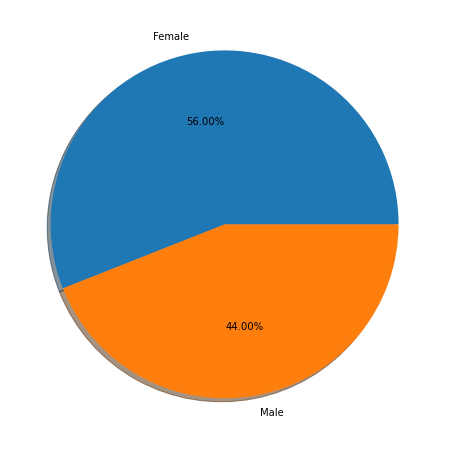

In [16]:
plt.figure(figsize = (10,8))
labels = ['Female', 'Male']
size = df['Genre'].value_counts()
plt.pie(size,  shadow = True, labels = labels,autopct = '%.2f%%')

<AxesSubplot:>

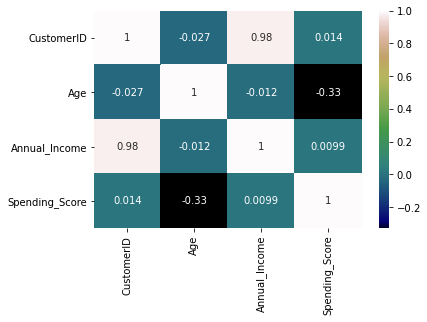

In [17]:
sns.heatmap(df.corr(),annot = True,cmap = 'gist_earth')

In [19]:
X = df.iloc[:, [2,3, 4]].values

# let's check the shape of x
print(X.shape)

(200, 3)


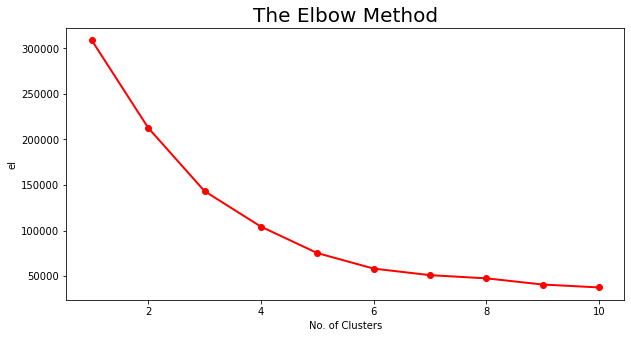

In [20]:
from sklearn.cluster import KMeans

el = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    el.append(km.inertia_)
    
plt.figure(figsize = (10,5))
plt.plot(range(1, 11),el,linewidth=2, marker='o',color ='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('el')
plt.show()

In [21]:
from mpl_toolkits.mplot3d import Axes3D

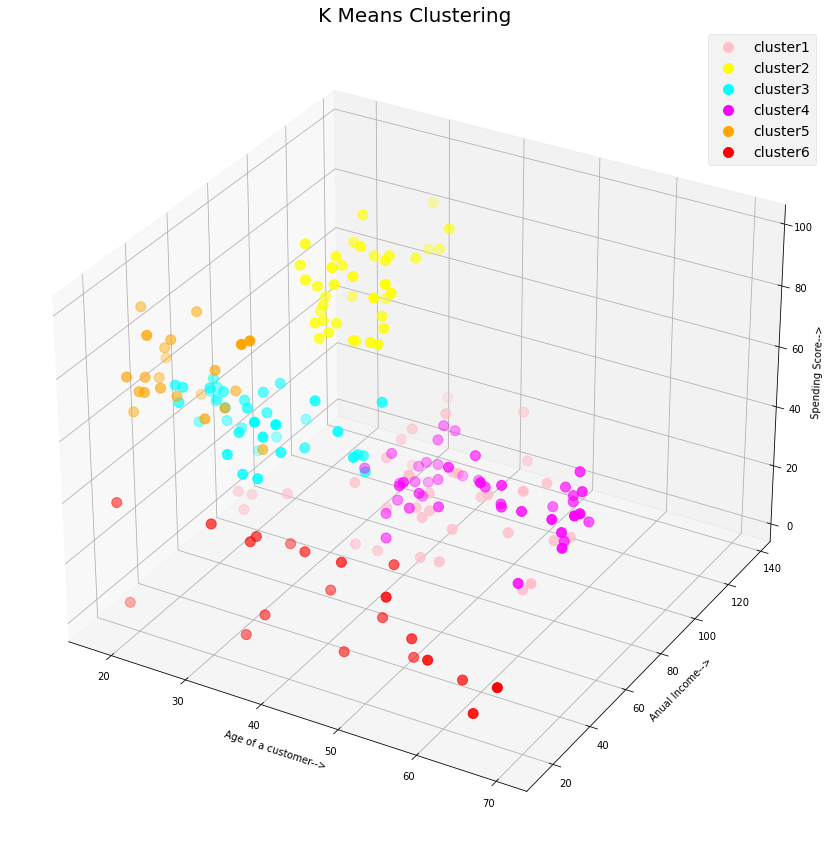

In [22]:

km = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_means == 0, 0], X[y_means == 0, 1], X[y_means == 0,2], s = 100, color = 'pink', label = 'cluster1')
ax.scatter(X[y_means == 1, 0], X[y_means == 1, 1],X[y_means == 1,2] , s = 100, color = 'yellow', label = 'cluster2')
ax.scatter(X[y_means == 2, 0], X[y_means == 2, 1],X[y_means == 2,2] , s = 100, color = 'cyan', label = 'cluster3')
ax.scatter(X[y_means == 3, 0], X[y_means == 3, 1],X[y_means == 3,2] , s = 100, color = 'magenta', label = 'cluster4')
ax.scatter(X[y_means == 4, 0], X[y_means == 4, 1],X[y_means == 4,2] , s = 100, color = 'orange', label = 'cluster5')
ax.scatter(X[y_means == 5, 0], X[y_means == 5, 1],X[y_means == 5,2] , s = 100, color = 'red', label = 'cluster6')


plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
plt.legend()


In [23]:
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots

In [24]:
Scene = dict(xaxis = dict(title  = 'Age -->'),yaxis = dict(title  = 'Spending Score--->'),zaxis = dict(title  = 'Annual Income-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = y_means
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

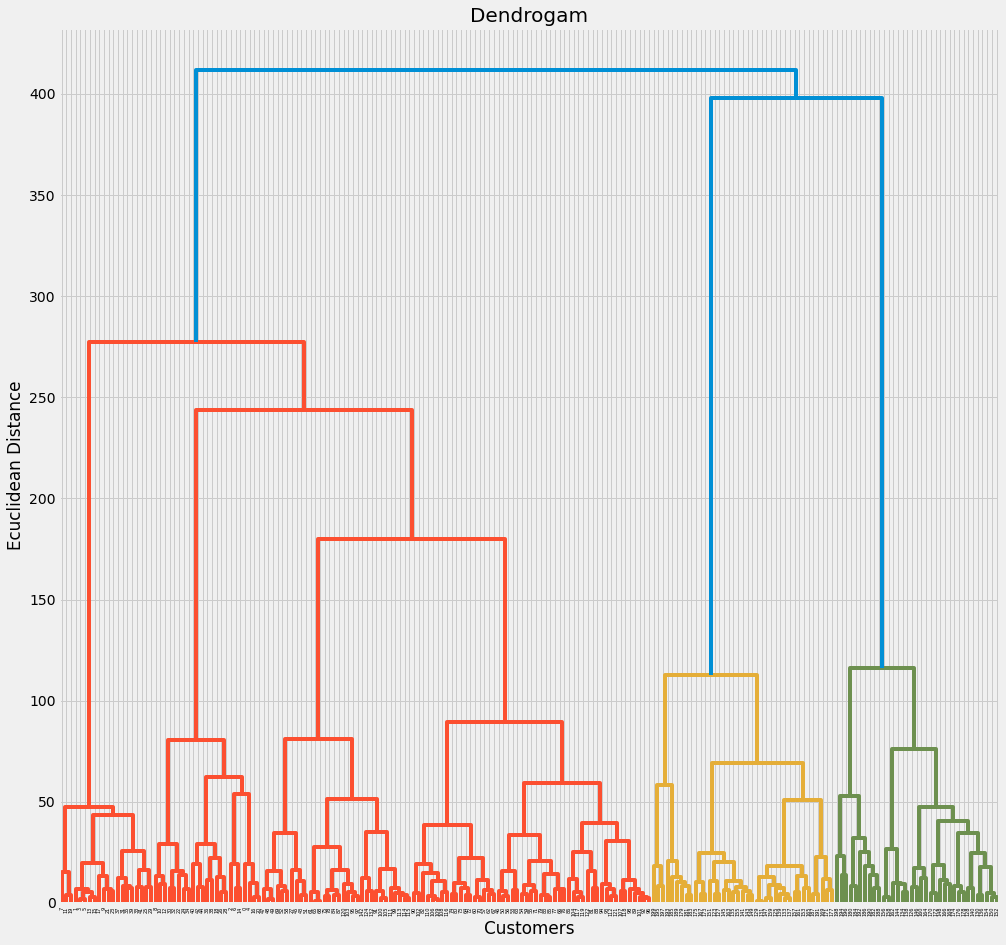

In [25]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (15,15))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()
#optimal clustes = 5 

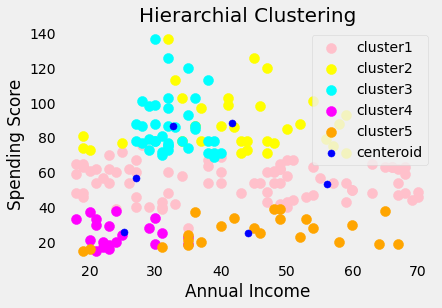

In [32]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'pink', label = 'cluster1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellow', label = 'cluster2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'cyan', label = 'cluster3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'magenta', label = 'cluster4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'orange', label = 'cluster5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

## After standardization 

In [27]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age','Annual_Income','Spending_Score']
for i in num_cols:
    
    # fit on training data column
    df[i] = StandardScaler().fit_transform(df[[i]])
    #df[i] = scale.transform(df[[i]])

In [28]:
X1 = df.iloc[:, [2,3, 4]].values

# let's check the shape of x
print(X1.shape)

(200, 3)


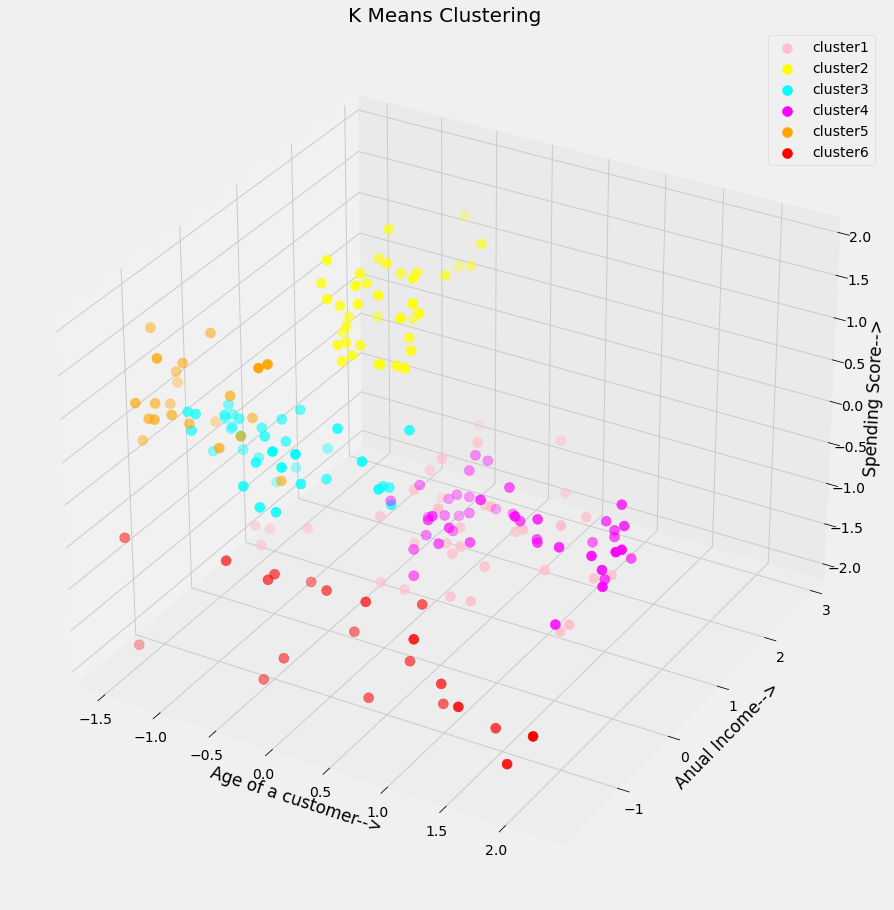

In [29]:

km = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means1 = km.fit_predict(X)
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[y_means1 == 0, 0], X1[y_means1 == 0, 1], X1[y_means1 == 0,2], s = 100, color = 'pink', label = 'cluster1')
ax.scatter(X1[y_means1 == 1, 0], X1[y_means1 == 1, 1],X1[y_means1 == 1,2] , s = 100, color = 'yellow', label = 'cluster2')
ax.scatter(X1[y_means1 == 2, 0], X1[y_means1 == 2, 1],X1[y_means1 == 2,2] , s = 100, color = 'cyan', label = 'cluster3')
ax.scatter(X1[y_means1 == 3, 0], X1[y_means1 == 3, 1],X1[y_means1 == 3,2] , s = 100, color = 'magenta', label = 'cluster4')
ax.scatter(X1[y_means1 == 4, 0], X1[y_means1 == 4, 1],X1[y_means1 == 4,2] , s = 100, color = 'orange', label = 'cluster5')
ax.scatter(X1[y_means1 == 5, 0], X1[y_means1 == 5, 1],X1[y_means1 == 5,2] , s = 100, color = 'red', label = 'cluster6')


plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
plt.legend()


In [30]:
Scene = dict(xaxis = dict(title  = 'Age -->'),yaxis = dict(title  = 'Spending Score--->'),zaxis = dict(title  = 'Annual Income-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = y_means1
trace = go.Scatter3d(x=X1[:, 0], y=X1[:, 1], z=X1[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()